In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo1 = "Datasets/taxi+_zone_lookup.csv"
df = pd.read_csv(ruta_archivo1)

df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [4]:
# Cambiar el nombre de las columnas
df.rename(columns={
    'LocationID': 'IDUbicacion',
    'Borough': 'Barrio',
    'Zone': 'Zona',
    'service_zone': 'ZonaServicio'
}, inplace=True)


print(df.head())


   IDUbicacion         Barrio                     Zona ZonaServicio
0            1            EWR           Newark Airport          EWR
1            2         Queens              Jamaica Bay    Boro Zone
2            3          Bronx  Allerton/Pelham Gardens    Boro Zone
3            4      Manhattan            Alphabet City  Yellow Zone
4            5  Staten Island            Arden Heights    Boro Zone


In [5]:
# Contar los valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Mostrar nulos
print(nulos_por_columna)


IDUbicacion     0
Barrio          0
Zona            1
ZonaServicio    2
dtype: int64


In [6]:
# valores únicos de cada columna, excepto para la columna de ID
for columna in df.columns:
    if columna != 'IDUbicacion':  # Omitir la columna de ID
        valores_unicos = df[columna].unique()
        print(f'Valores únicos en {columna}: {valores_unicos}\n')



Valores únicos en Barrio: ['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown']

Valores únicos en Zona: ['Newark Airport' 'Jamaica Bay' 'Allerton/Pelham Gardens' 'Alphabet City'
 'Arden Heights' 'Arrochar/Fort Wadsworth' 'Astoria' 'Astoria Park'
 'Auburndale' 'Baisley Park' 'Bath Beach' 'Battery Park'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace/Fort Totten' 'Bayside'
 'Bedford' 'Bedford Park' 'Bellerose' 'Belmont' 'Bensonhurst East'
 'Bensonhurst West' 'Bloomfield/Emerson Hill' 'Bloomingdale' 'Boerum Hill'
 'Borough Park' 'Breezy Point/Fort Tilden/Riis Beach'
 'Briarwood/Jamaica Hills' 'Brighton Beach' 'Broad Channel' 'Bronx Park'
 'Bronxdale' 'Brooklyn Heights' 'Brooklyn Navy Yard' 'Brownsville'
 'Bushwick North' 'Bushwick South' 'Cambria Heights' 'Canarsie'
 'Carroll Gardens' 'Central Harlem' 'Central Harlem North' 'Central Park'
 'Charleston/Tottenville' 'Chinatown' 'City Island' 'Claremont/Bathgate'
 'Clinton East' 'Clinton Hill' 'Clinton West' 'Co-Op City' '

Barrio
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: count, dtype: int64


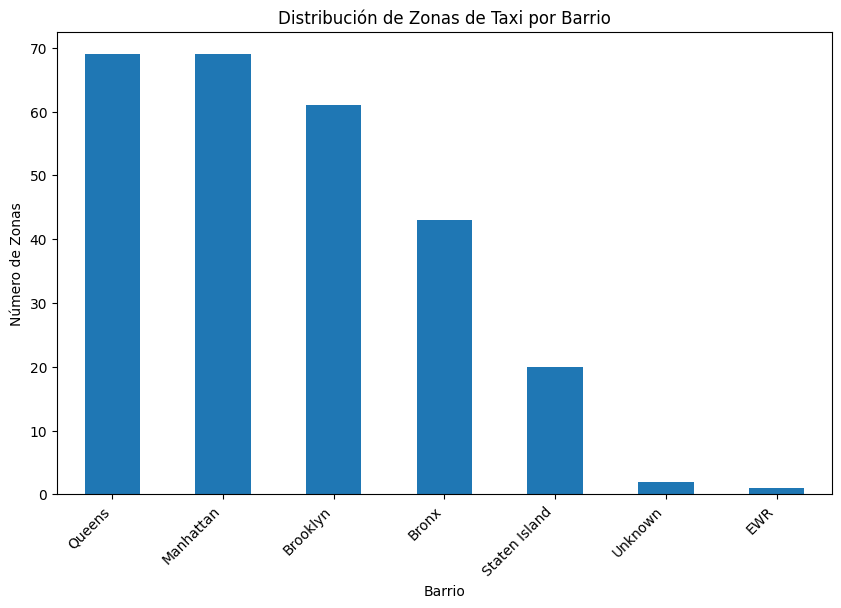

In [7]:
# número de zonas por barrio
zonas_por_barrio = df['Barrio'].value_counts()

# mostrar el conteo de zonas por barrio
print(zonas_por_barrio)

# gráfico de barras de la distribución de zonas por barrio
plt.figure(figsize=(10, 6))
zonas_por_barrio.plot(kind='bar')
plt.title('Distribución de Zonas de Taxi por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Zonas')
plt.xticks(rotation=45, ha='right')  # rotar las etiquetas del eje x 
plt.show()


Zona y tipo de servicio:

- EWR: Se refiere al Aeropuerto Internacional Newark Liberty (código de aeropuerto: EWR), ubicado en Newark, Nueva Jersey, pero sirve principalmente a la ciudad de Nueva York. 

- Boro Zone: Las "Boro Zones" o zonas de distrito se refieren a áreas fuera del corazón central de Manhattan, cubriendo los otros cuatro boroughs de Nueva York (Brooklyn, Queens, Bronx y Staten Island) y, en algunos casos, partes más alejadas de Manhattan. Estas zonas son atendidas principalmente por taxis verdes (boro taxis) que tienen el permiso de recoger pasajeros en estas áreas.

- Yellow Zone: la zona amarilla se refiere principalmente al área central de Manhattan donde los taxis amarillos tienen el derecho exclusivo de recoger pasajeros en la calle.

- Se refiere a las zonas específicas de los aeropuertos de la ciudad de Nueva York, que incluyen, además de EWR, el Aeropuerto Internacional John F. Kennedy (JFK) y el Aeropuerto LaGuardia (LGA).


ZonaServicio
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64


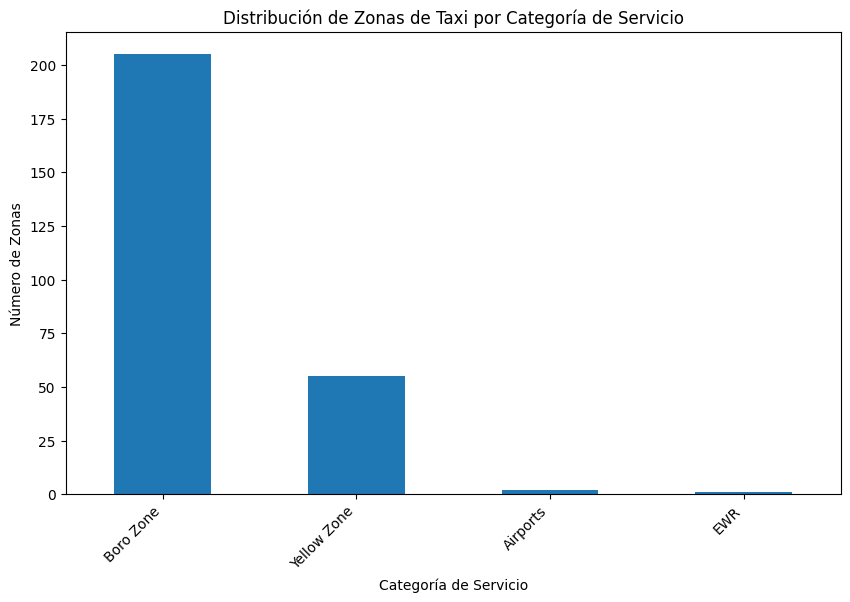

In [8]:
# número de zonas por categoría de servicio
zonas_por_servicio = df['ZonaServicio'].value_counts()

# Mostrar el conteo de zonas por categoría de servicio
print(zonas_por_servicio)

# gráfico de barras de la distribución de zonas por categoría de servicio
plt.figure(figsize=(10, 6))
zonas_por_servicio.plot(kind='bar')
plt.title('Distribución de Zonas de Taxi por Categoría de Servicio')
plt.xlabel('Categoría de Servicio')
plt.ylabel('Número de Zonas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x 
plt.show()
